In [164]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
#Untuk Google Colab :
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df = pd.read_csv('/content/drive/MyDrive/GoogleColab/shopping_trends.csv')
print(f'Shape of the data: {df.shape}')
df.head()

Mounted at /content/drive
Shape of the data: (3900, 19)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [167]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [168]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,NaN,NaN,NaN,1950.5,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,NaN,NaN,NaN,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Gender,3900,2,Male,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Purchased,3900,25,Blouse,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,3900,4,Clothing,1737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Amount (USD),3900.0,NaN,NaN,NaN,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Location,3900,50,Montana,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,3900,4,M,1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,3900,25,Olive,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,3900,4,Spring,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [170]:
df.Gender.value_counts()

,count
Gender,
Male,2652
Female,1248


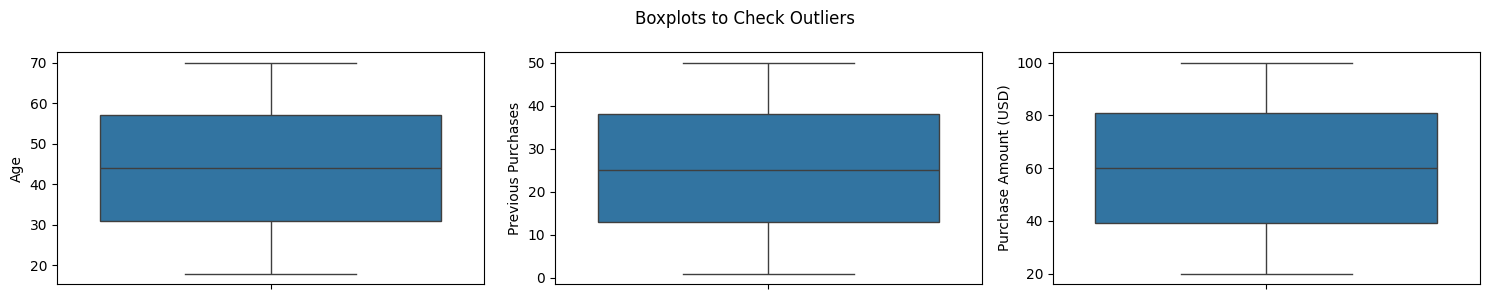

In [171]:
# Outliers check
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cols = ['Age', 'Previous Purchases', 'Purchase Amount (USD)']
for i in range(len(cols)):
    sns.boxplot(df[cols[i]], ax=axs[i])
fig.suptitle('Boxplots to Check Outliers')
plt.tight_layout()
plt.show()

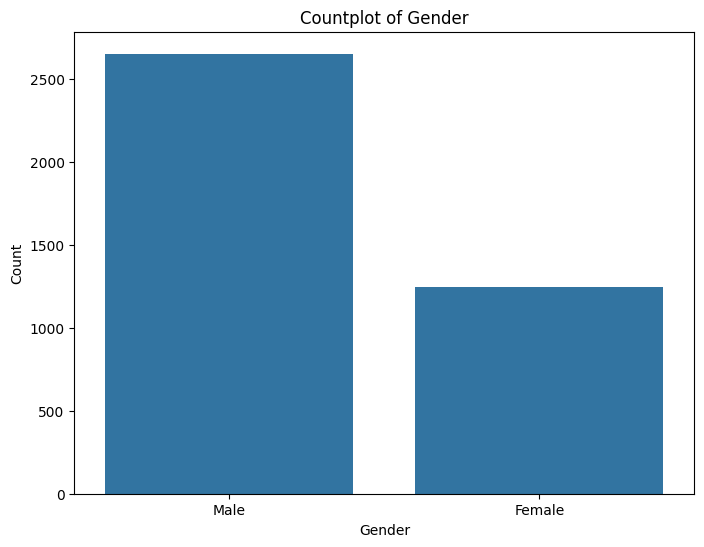

In [172]:
# Membuat countplot untuk variabel Gender
plt.figure(figsize=(8, 6))  # Mengatur ukuran figure
sns.countplot(x='Gender', data=df)  # Menggunakan countplot
plt.title('Countplot of Gender')  # Menambahkan judul
plt.xlabel('Gender')  # Menambahkan label sumbu x
plt.ylabel('Count')  # Menambahkan label sumbu y
plt.show()  # Menampilkan plot

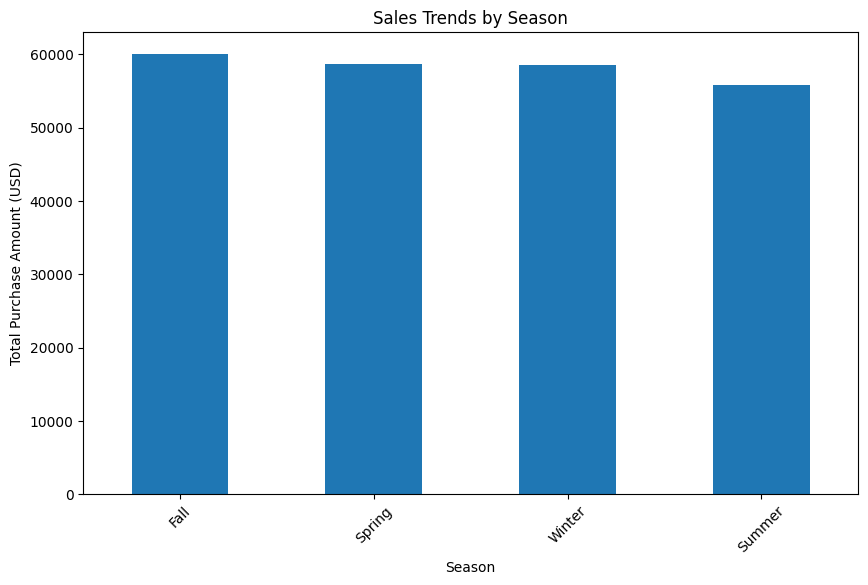

In [173]:
# Group data by Season and calculate total sales per season
sales_by_season = df.groupby('Season')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

# Plot Sales Trends by Season
plt.figure(figsize=(10, 6))
sales_by_season.plot(kind='bar')
plt.title('Sales Trends by Season')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

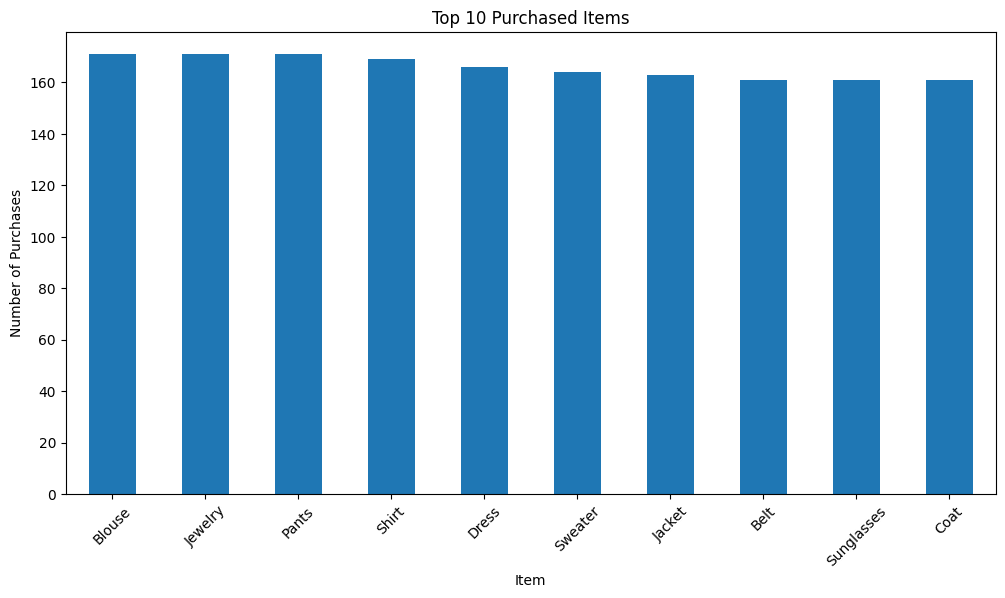

In [174]:
# Get the top 10 most purchased items
top_purchased_items = df['Item Purchased'].value_counts().head(10)

# Plot the top purchased items
plt.figure(figsize=(12, 6))
top_purchased_items.plot(kind='bar')
plt.title('Top 10 Purchased Items')
plt.xlabel('Item')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

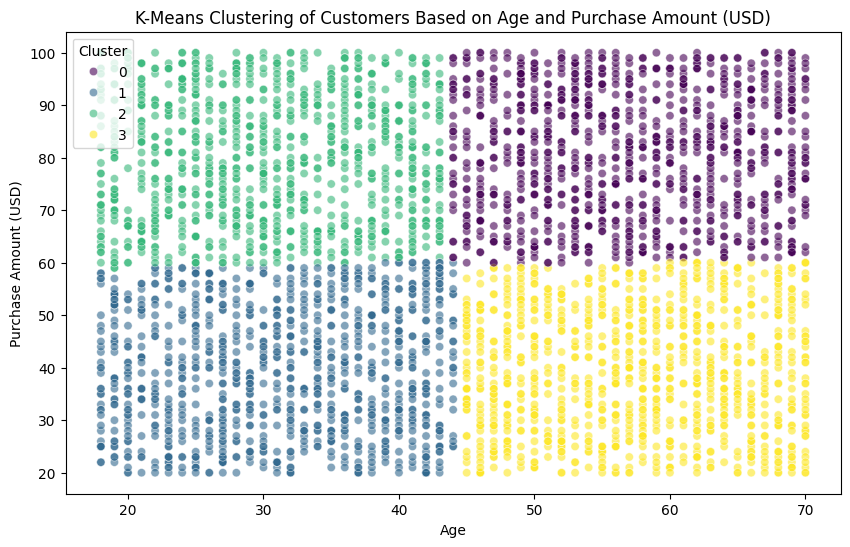

In [175]:
# Mengambil fitur yang relevan
data = df[['Age','Purchase Amount (USD)']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=4, random_state=42)  # Misalkan kita ingin 4 cluster
kmeans.fit(data_scaled)

# Menambahkan label cluster ke DataFrame
df['Cluster'] = kmeans.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Cluster', data=df, palette='viridis', alpha=0.6)
plt.title('K-Means Clustering of Customers Based on Age and Purchase Amount (USD)')  # Menambahkan judul
plt.xlabel('Age')  # Menambahkan label sumbu x
plt.ylabel('Purchase Amount (USD)')  # Menambahkan label sumbu y
plt.legend(title='Cluster')
plt.show()  # Menampilkan plot

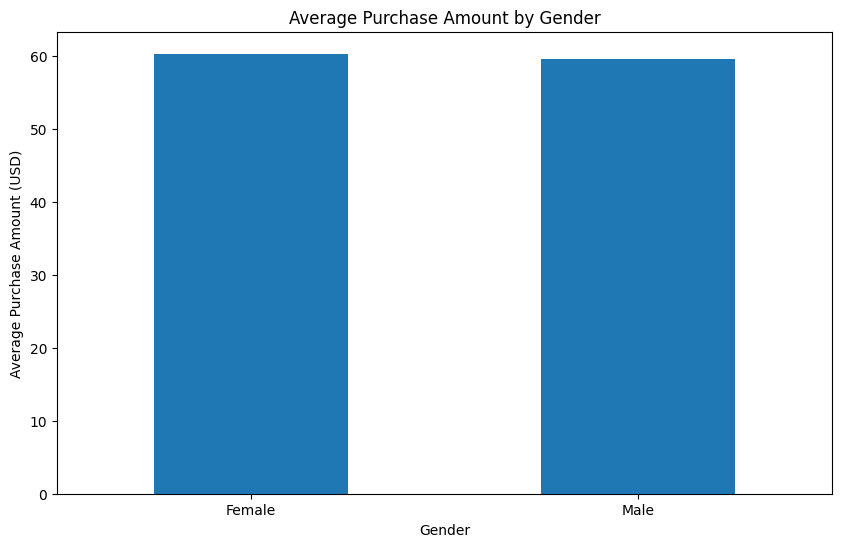

In [176]:
# Calculate average purchase amount by gender
purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

# Plot the average purchase amount by gender
plt.figure(figsize=(10, 6))
purchase_by_gender.plot(kind='bar')
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=0)
plt.show()

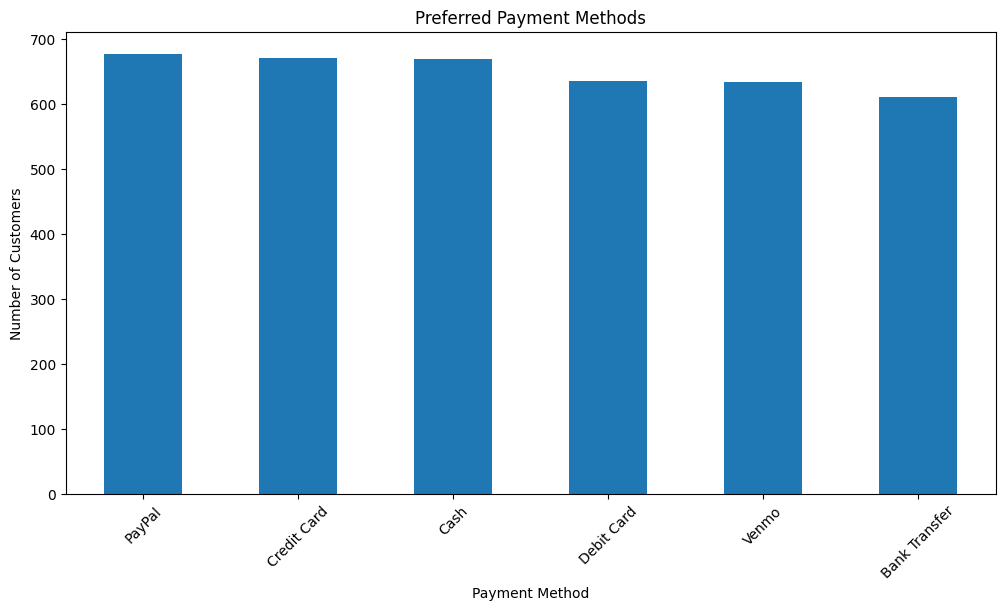

In [177]:
# Get the distribution of preferred payment methods
preferred_payment_methods = df['Preferred Payment Method'].value_counts().head(10)

# Plot the preferred payment methods
plt.figure(figsize=(12, 6))
preferred_payment_methods.plot(kind='bar')
plt.title('Preferred Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

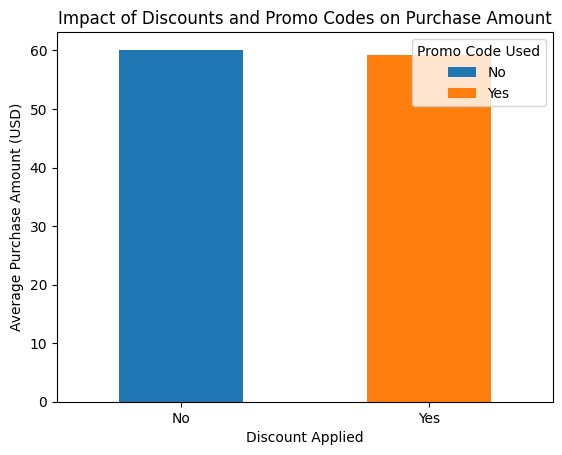

In [178]:
# Group data by Discount Applied and Promo Code Used, and calculate average purchase amount
discount_promo_impact = df.groupby(['Discount Applied', 'Promo Code Used'])['Purchase Amount (USD)'].mean().unstack()

# Plot the impact of discounts and promo codes
plt.figure(figsize=(12, 6))
discount_promo_impact.plot(kind='bar', stacked=True)
plt.title('Impact of Discounts and Promo Codes on Purchase Amount')
plt.xlabel('Discount Applied')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=0)
plt.legend(title='Promo Code Used', loc='upper right')
plt.show()

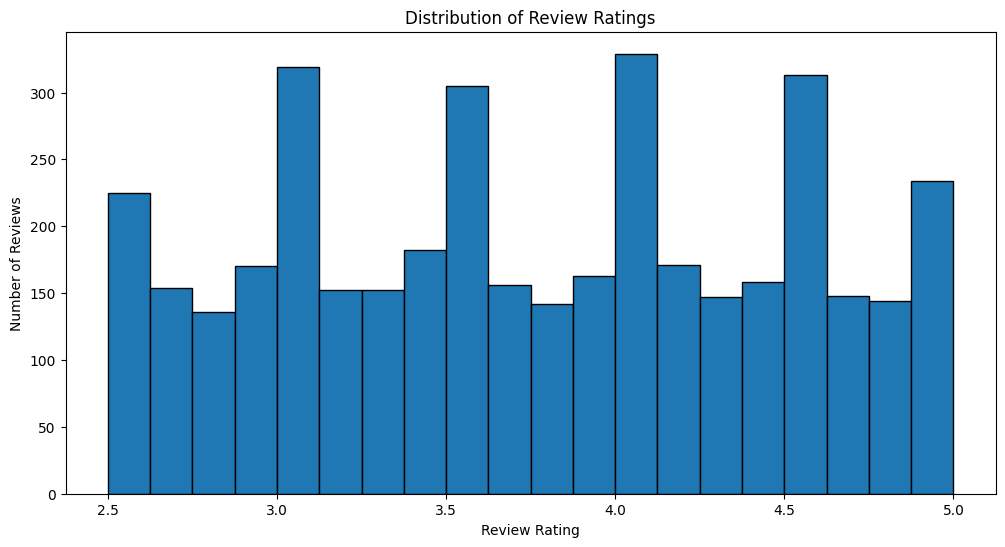

In [179]:
# Plot the distribution of review ratings
plt.figure(figsize=(12, 6))
df['Review Rating'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Number of Reviews')
plt.show()

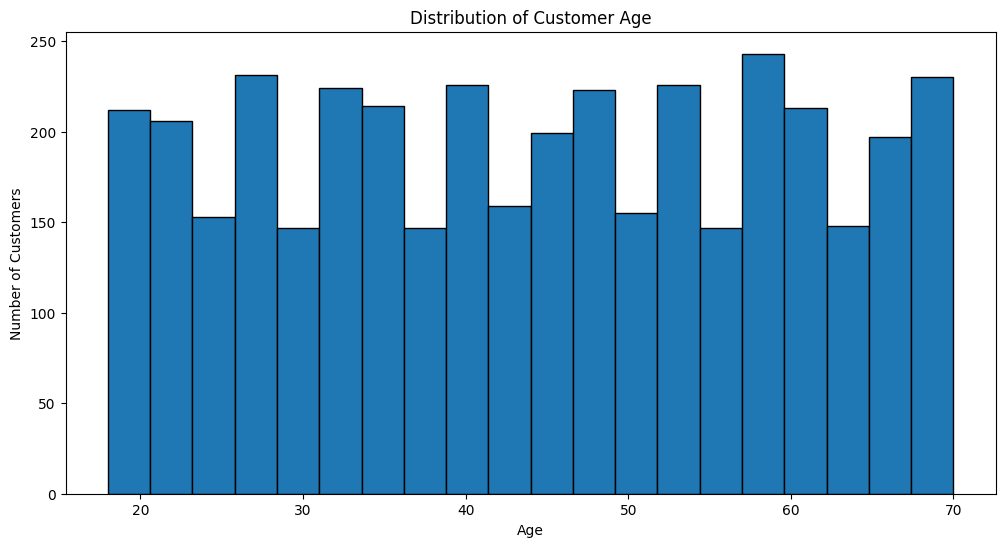

In [180]:
# Plot the distribution of customer age
plt.figure(figsize=(12, 6))
df['Age'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

In [181]:
df_tmp = df.copy()

In [182]:
if 'Customer ID' in df_tmp.columns:
    identity = df_tmp["Customer ID"]  # Simpan Customer ID jika diperlukan di masa depan
    df_tmp = df_tmp.drop(columns="Customer ID")

In [183]:
df_encoded = pd.get_dummies(df_tmp, drop_first=True)

In [152]:
print(df_encoded.head())

   Age  Purchase Amount (USD)  Review Rating  Previous Purchases  Cluster  \
0   55                     53            3.1                  14        3   
1   19                     64            3.1                   2        2   
2   50                     73            3.1                  23        0   
3   21                     90            3.5                  49        2   
4   45                     49            2.7                  31        3   

   Gender_Male  Item Purchased_Belt  Item Purchased_Blouse  \
0         True                False                   True   
1         True                False                  False   
2         True                False                  False   
3         True                False                  False   
4         True                False                   True   

   Item Purchased_Boots  Item Purchased_Coat  ...  \
0                 False                False  ...   
1                 False                False  ...   
2    

In [184]:
# Feature Selection
df_fs = df.drop(columns='Age')

# Label Encoding
df_encoded = df_fs.replace({'Gender': {'Female':0, 'Male':1}})

# Feature Scaling
#scaler = MinMaxScaler()
#X = scaler.fit_transform(df_encoded)
X = df_encoded

<ipython-input-184-fb4810540240>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_fs.replace({'Gender': {'Female':0, 'Male':1}})


In [185]:
# Cek tipe data dalam X
print(X.dtypes)

# Cek apakah ada kolom non-numerik
print(X.select_dtypes(include=['object']).head())

Customer ID                   int64
Gender                        int64
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
Cluster                       int32
dtype: object
  Item Purchased  Category       Location Size      Color  Season  \
0         Blouse  Clothing       Kentucky    L       Gray  Winter   
1        Sweater  Clothing          Maine    L     Maroon  Winter   
2          Jeans  Clothing  Massachusetts    S     Maroon  Spring   
3        Sandals  Footwear

In [186]:
from sklearn.preprocessing import LabelEncoder

# Mengonversi semua kolom kategorikal ke numerik
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

In [187]:
print(X.dtypes)

Customer ID                   int64
Gender                        int64
Item Purchased                int64
Category                      int64
Purchase Amount (USD)         int64
Location                      int64
Size                          int64
Color                         int64
Season                        int64
Review Rating               float64
Subscription Status           int64
Payment Method                int64
Shipping Type                 int64
Discount Applied              int64
Promo Code Used               int64
Previous Purchases            int64
Preferred Payment Method      int64
Frequency of Purchases        int64
Cluster                       int32
dtype: object


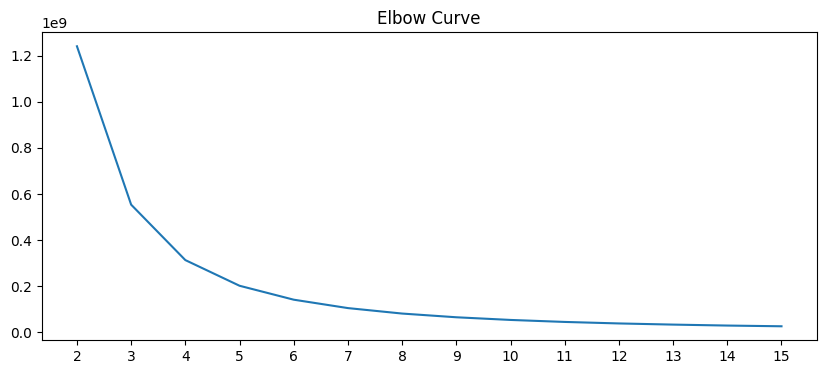

In [188]:
# Elbow Method to identify optimum no. of clusters
inertia = []
range_of_clusters = list(range(2, 16))
for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Curve
plt.figure(figsize=(10, 4))
plt.plot(range_of_clusters, inertia)
plt.xticks(range_of_clusters)
plt.title('Elbow Curve')
plt.show()

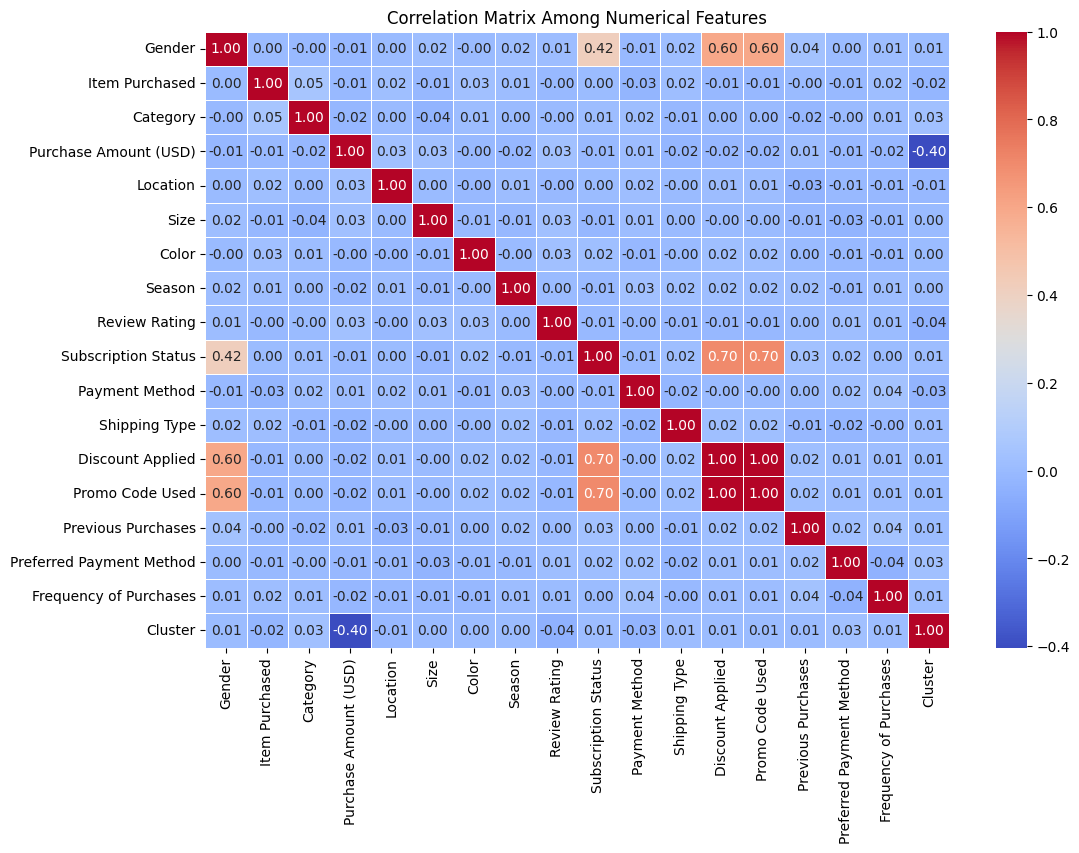

In [189]:
# Remove 'Customer ID' from the correlation matrix
correlation_matrix = df_encoded.drop('Customer ID', axis=1).corr()

# Plot the updated correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Among Numerical Features')
plt.show()

In [190]:
df_tmp = pd.concat([identity, df_encoded], axis=1)

In [191]:
one_hot_columns = df_tmp.columns

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Misalkan df adalah DataFrame Anda
# 🛠️ Step 1: Feature Selection
df_fs = df.drop(columns='Age')

# 🛠️ Step 2: Label Encoding untuk Gender
df_encoded = df_fs.replace({'Gender': {'Female': 0, 'Male': 1}})

# 🛠️ Step 3: One-Hot Encoding untuk kolom kategorikal lainnya
df_encoded = pd.get_dummies(df_encoded, drop_first=True)  # Menggunakan One-Hot Encoding

# 🛠️ Step 4: Pisahkan Fitur dan Target
target = df_encoded['Gender']
df_encoded = df_encoded.drop(columns='Gender')

# 🛠️ Step 5: Cek tipe data dalam df_encoded sebelum scaling
print(df_encoded.dtypes)

# 🛠️ Step 6: Feature Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(df_encoded)

# Jika Anda ingin memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Jika Anda ingin memeriksa tipe data setelah scaling, Anda bisa mengonversi kembali ke DataFrame
X_df = pd.DataFrame(X, columns=df_encoded.columns)  # Mengonversi kembali ke DataFrame
print(X_df.dtypes)  # Cek tipe data dalam X_df

Customer ID                                int64
Purchase Amount (USD)                      int64
Review Rating                            float64
Previous Purchases                         int64
Cluster                                    int32
                                          ...   
Frequency of Purchases_Every 3 Months       bool
Frequency of Purchases_Fortnightly          bool
Frequency of Purchases_Monthly              bool
Frequency of Purchases_Quarterly            bool
Frequency of Purchases_Weekly               bool
Length: 135, dtype: object
Customer ID                              float64
Purchase Amount (USD)                    float64
Review Rating                            float64
Previous Purchases                       float64
Cluster                                  float64
                                          ...   
Frequency of Purchases_Every 3 Months    float64
Frequency of Purchases_Fortnightly       float64
Frequency of Purchases_Monthly           f

<ipython-input-192-a2e7dc965ee5>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_fs.replace({'Gender': {'Female': 0, 'Male': 1}})


In [193]:
# Verifikasi bentuk dataset
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3120, 135)
Shape of X_test: (780, 135)
Shape of y_train: (3120,)
Shape of y_test: (780,)


In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 🛠️ Step 6: Inisialisasi Model
model = LogisticRegression()

# 🛠️ Step 7: Latih Model
model.fit(X_train, y_train)

# 🛠️ Step 8: Evaluasi Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.982051282051282
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       228
           1       0.99      0.98      0.99       552

    accuracy                           0.98       780
   macro avg       0.97      0.98      0.98       780
weighted avg       0.98      0.98      0.98       780



In [195]:
# Calculate correlation matrix excluding 'Customer ID'
correlation_matrix = df_encoded.drop('Customer ID', axis=1).corr()

# Filter correlations above 0.5 (excluding self-correlations of 1.0)
strong_correlations = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix != 1.0)].stack().reset_index()
strong_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']
strong_correlations = strong_correlations.sort_values(by='Correlation', ascending=False)

# Display the strong correlations as a table
import pandas as pd
from IPython.display import display

# Display the resulting DataFrame
display(strong_correlations)


,Feature 1,Feature 2,Correlation
4,Subscription Status_Yes,Discount Applied_Yes,0.700202
5,Subscription Status_Yes,Promo Code Used_Yes,0.700202
6,Discount Applied_Yes,Subscription Status_Yes,0.700202
7,Promo Code Used_Yes,Subscription Status_Yes,0.700202
1,Item Purchased_Jacket,Category_Outerwear,0.693839
3,Category_Outerwear,Item Purchased_Jacket,0.693839
0,Item Purchased_Coat,Category_Outerwear,0.689384
2,Category_Outerwear,Item Purchased_Coat,0.689384


In [196]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 🛠️ Step 9: Model Selection
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Evaluasi setiap model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name}: Accuracy = {scores.mean():.4f}")

Logistic Regression: Accuracy = 0.9724
Decision Tree: Accuracy = 0.9994
Random Forest: Accuracy = 0.9990
SVM: Accuracy = 0.9542


In [197]:
import joblib

# Simpan model terbaik
joblib.dump(model, 'best_model.pkl')

# Load model
loaded_model = joblib.load('best_model.pkl')

In [198]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Menghitung akurasi
from sklearn.metrics import accuracy_score

In [201]:
print(y_test[:5])
print(y_pred[:5])

839     1
1717    1
321     1
3187    0
2269    1
Name: Gender, dtype: int64
[1 1 1 0 1]


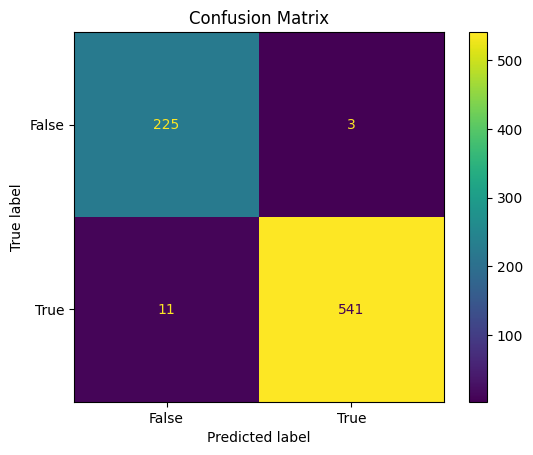

In [202]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat tampilan confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

# Plot confusion matrix
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()